In [1]:
using PyPlot
using Ipopt
using JuMP

objc[946]: Class TKApplication is implemented in both /System/Library/Frameworks/Tk.framework/Versions/8.5/Tk and /Users/charles/anaconda/lib/libtk8.5.dylib. One of the two will be used. Which one is undefined.
objc[946]: Class TKMenu is implemented in both /System/Library/Frameworks/Tk.framework/Versions/8.5/Tk and /Users/charles/anaconda/lib/libtk8.5.dylib. One of the two will be used. Which one is undefined.
objc[946]: Class TKContentView is implemented in both /System/Library/Frameworks/Tk.framework/Versions/8.5/Tk and /Users/charles/anaconda/lib/libtk8.5.dylib. One of the two will be used. Which one is undefined.
objc[946]: Class TKWindow is implemented in both /System/Library/Frameworks/Tk.framework/Versions/8.5/Tk and /Users/charles/anaconda/lib/libtk8.5.dylib. One of the two will be used. Which one is undefined.


In [67]:
data = readcsv("/Users/charles/Dropbox/NeuralNetwork/viscosity/data/viscosity.csv",skipstart=1)
sio2  = data[:,2]./100
tio2  = data[:,3]./100
al2o3 = data[:,4]./100
feo   = data[:,5]./100
mno   = data[:,6]./100
bao   = data[:,7]./100
sro   = data[:,8]./100
mgo   = data[:,9]./100
cao   = data[:,10]./100
li2o  = data[:,11]./100
na2o  = data[:,12]./100
k2o   = data[:,13]./100
h2o   = data[:,14]./100
T     = data[:,15]
n     = data[:,16]
println("Done")

nb_at = [3,3,5,2,2,2,2,2,2,3,3,3,5,3]

ref = Array{Float64}(data[data[:,2] .== 100,2:17])
data_fit = Array{Float64}(data[data[:,2] .!= 100,2:17])

data_fit[:,1:14] = data_fit[:,1:14]./100
ref[:,1:14] = ref[:,1:14]./100

Done


20x14 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

rmsd: [NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

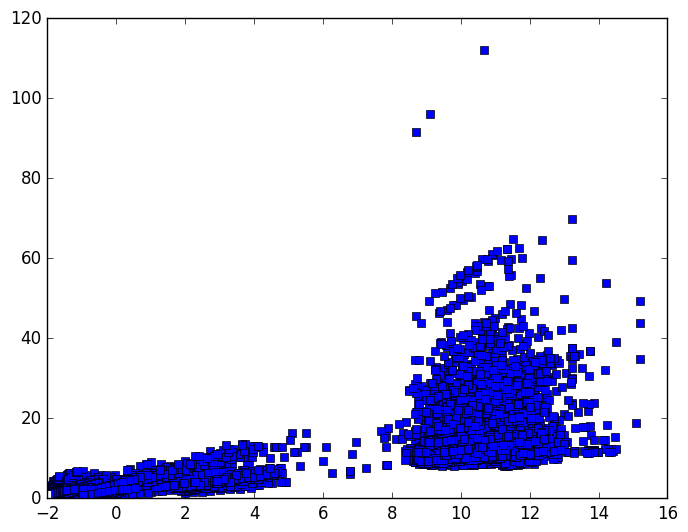

,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [89]:
## Model
mod = Model(solver=IpoptSolver(acceptable_tol = 1e-10))

# starting values

@variable(mod,ni[i=1:14], start = 1.0)
@variable(mod,K[i=1:14] , start = 1.0)
@variable(mod,mo, start = 14.9)

@NLexpression(mod,KR,1480.0*(3-sum{ref[1,i]*ni[i],i=1:14}))

@NLexpression(mod,Tg[j=1:size(data_fit,1)],KR/(3-sum{data_fit[j,i]*ni[i]/(data_fit[j,i]*nb_at[i]),i=1:14}))

@NLexpression(mod,mmm[j=1:size(data_fit,1)], mo * (1+sum{data_fit[j,i]*K[i],i=1:14}))

@NLexpression(mod,n_calc[j=1:size(data_fit,1)],(12-mo) + mo * Tg[j]/data_fit[j,15]*exp( (mmm[j]/mo-1)*(Tg[j]/data_fit[j,15]-1)))

@NLobjective(mod,Min,sum{(n_calc[j]-data_fit[j,16])^2,j=1:size(data_fit,1)})


ni_i = getvalue(ni)
K_i = getvalue(K)
mo_i = getvalue(mo)


KR_i = 1480.0*(3-sum(ref[1,1:14]*ni_i[1:14],2)) 
Tg_i = KR_i./(3-sum(data_fit[:,1:14]*ni_i[1:14]./(data_fit[:,1:14]*nb_at[1:14]),2))

M_i[:] = mo_i .* (1+sum(data_fit[:,1:14]*K_i[1:14],2))

n_pred_i = (12-mo_i) + mo_i .* Tg_i[:]./data_fit[:,15].*exp( (M_i[:]./mo_i-1).*(Tg_i[:]./data_fit[:,15]-1))




figure()
#for i = 1:size(data_fit,1)
#    plot(data_fit[:,15],n_pred_i,linestyle="",marker="s",color=[data_fit[i,2]./100,data_fit[i,1]./100,(data_fit[i,3]+data_fit[i,4])./100])
#end
plot(data_fit[:,16],n_pred_i,linestyle="",marker="s")

println("rmsd: ", getvalue(n_calc))

In [74]:
#### Solve for the control and state
println("Solving...")
status = solve(mod)

# Display results
println("Solver status: ", status)
println("rmsd: ", getobjectivevalue(mod))

Solving...
This is Ipopt version 3.12.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      435

Total number of variables............................:       29
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0


Number of Iterations....: 0

Number of objective function evaluations      

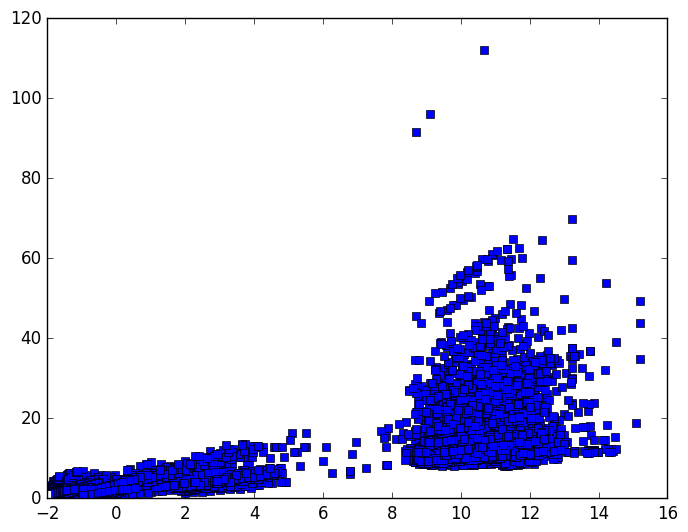

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32dcd3990>

In [75]:
ni_i = getvalue(ni)
K_i = getvalue(K)
mo_i = getvalue(mo)


KR_i = 1480.0*(3-sum(ref[1,1:14]*ni_i[1:14],2)) 
Tg_i = KR_i./(3-sum(data_fit[:,1:14]*ni_i[1:14]./(data_fit[:,1:14]*nb_at[1:14]),2))

M_i[:] = mo_i .* (1+sum(data_fit[:,1:14]*K_i[1:14],2))

n_pred_i = (12-mo_i) + mo_i .* Tg_i[:]./data_fit[:,15].*exp( (M_i[:]./mo_i-1).*(Tg_i[:]./data_fit[:,15]-1))

figure()
#for i = 1:size(data_fit,1)
#    plot(data_fit[:,15],n_pred_i,linestyle="",marker="s",color=[data_fit[i,2]./100,data_fit[i,1]./100,(data_fit[i,3]+data_fit[i,4])./100])
#end
plot(data_fit[:,16],n_pred_i,linestyle="",marker="s")

In [43]:
println("Ae is $(Ae_m)")
println("Be is $(Be_m)")
println("ScTg is $(ScTg_m)")
println("partial ap are $(ap_m)")
println("partial no are $(no_m)")
println("partial Ta are $(Ta_m)")


LoadError: LoadError: UndefVarError: Ae_m not defined
while loading In[43], in expression starting on line 1

In [86]:
find((n_pred_i))


0-element Array{Int64,1}

In [7]:
exp( .*(Tg_i[:]./data_fit[:,14]-1))

LoadError: LoadError: MethodError: `getindex` has no method matching getindex(::Float64, ::Colon)
Closest candidates are:
  getindex(::Number)
  getindex(::Number, !Matched::Integer)
  getindex(::Number, !Matched::Integer...)
  ...
while loading In[7], in expression starting on line 1

In [72]:
Tg_i

5517-element Array{Float64,1}:
 1480.0
 1480.0
 1480.0
 1480.0
 1480.0
 1480.0
 1480.0
 1480.0
 1480.0
 1480.0
 1480.0
 1480.0
 1480.0
    ⋮  
 1480.0
 1480.0
 1480.0
 1480.0
 1480.0
 1480.0
 1480.0
 1480.0
 1480.0
 1480.0
 1480.0
 1480.0

In [71]:
KR_i

1-element Array{Float64,1}:
 4440.0